# Week 4 - Social Data Analysis, DTU
20.02.2024

## Part 1: More lecturing on dataviz

Excercise: Some questions about the video. Try to answer using your human brain (rather than your LLMs first).

- Mention 10 examples of ways we can encode data.

*Height/length, area size, color, position (eg geographical), shape, angle, line weight (thicknmess),line ending,* texture, pattern*

- Are all encodings created equally? Why not? Can you think of an example from the previous lectures?

*No. Some are easier to visualise than others. Eg. length or line thickness is easier than angle and size.*

- Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?

*Angle, color shades, and sizes. 
Find online ... pie charts, color maps and ... I dunno, it's all good.*

- Explain in your own words: What is the problem with pie-charts?

*It is hard to see which has a higher area and angle ... but I think if you need precision, then you can attach numbers to the pie chart. I do not agree that pie charts are always a no-go, for they can be quite good for the eye, if there are not too many pie pieces (like 4-6 max)*

## Part 2: Visualizing geo-data

It turns out that plotly (which we used during Week 2) is not the only way of working with geo-data. There are many different ways to go about it. (The more advanced PhD and PostDoc researchers in my group simply use matplotlib, since that provides more control. For an example of that kind of thing, check out this tutorial.)

Today, we'll try another library for geodata called Folium. It's good for you all to try out a few different libraries - remember that data visualization and analysis in Python is all about the ability to use many different tools.

The exercise below is based on the code illustrated in this nice tutorial, so let us start by taking a look at that one.

Reading. Read through the following tutorial

"How to: Folium for maps, heatmaps & time data". Get it here: https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data. [UPDATE 2024: Note that the Stamen tiles are no longer avialible.]
(Optional) There are also some nice tricks in "Spatial Visualizations and Analysis in Python with Folium". Read it here: https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf

*Exercise:* A different take on geospatial data. It's OK to use your LLM for all of the Folium exercises.

A couple of weeks ago (Part 3 of Week 2), we worked with spacial data by using color-intensity of shapefiles to show the counts of certain crimes within those individual areas. Today, we look at studying geospatial data by plotting raw data points as well as heatmaps on top of actual maps.

- First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command folium.Map([lat, lon], zoom_start=13), where you'll have to look up San Francisco's longitude and latitude.
- Next, use the the coordinates for SF City Hall 37.77919, -122.41914 to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool. UPDATE 2024: Note that the Stamen tiles are no longer avialible, but there are many other tile-options. Link for more options on Stamen here).

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import folium

#lat and lon copied from previos average calculations
lat = 37.77664605675238
lon = -122.42493579160154
    
map_SF = folium.Map([lat, lon], zoom_start=13)

folium.Marker([37.77919, -122.41914], popup='SF City Hall').add_to(map_SF)
map_SF

- Now, let's plot some more data (no need for pop-ups this time). Select a couple of months of data for 'DRUG/NARCOTIC' and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. We can call this kind of visualization a point scatter plot.

## Part 3: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4). 

The data errors we discovered at the end of Week 4 become hard (or impossible) to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, in a more general sense, we learn that when we visualize, data errors become difficult to identify when binning the data. We explore this process in the exercise below.

### In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. 

3 examples for when histigram and bar plots in bins can show trends, but we miss small irregularities, that might have been interesting or there might be errors due to bias, eg: 
    
1. It prostitution most common on Thursdays or is it an error? There could be a bias, if there is a practising on registering or updating the official logs on Thursdays, for the whole week, and if date is missing, it will be "todays date".
2. Timestamps written manually are often rounded to whole hours or 15 mins marks. It's a human thing to round a number, especially if the accurate time is not known. 
3. Hall of Justice is not where the sex offences happen - could be where they are registered because the sentence was given there. Hence this is the place when the sex offender was found guilty. 


### Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

Misconceptions due to the biases and errors can result in attention to the wrong days and times in crime prevention attempts, when using data evidence for when and where to insert special forces to handle crime.


### Find your own example of human noise in the data and visualize it.

Examples of human noise:
- Rounding numbers
- Using the wrong scale (like 1-100 instead of 1-10 due to a misunderstanding)
- Misclassification in wrong category due to misunderstanding
- Inconsistent date format entry
- Duplicate or ommited data entry due to forgetfullness
- Biased responses given due to "expected expectations" (like when a student is answering a survey on cheating ...) or other wrong subjective evaluations.
      
As personal example (subjective bias): When I was moving about 20 years ago, I made a webform registration for people who wanted to help me, and I asked how many slices of pizza they thoight they could eat afterwards. I had an expectation that a hungry person would answer a larger amount than a full person, so I also asked "How hungry are you right now?", and corrected +/- some percentage, which I can't remember now.
      
Not sure it makes sense to visualise this, so instead, I present this slightly more boring example of human noise answering in the wrong range (made by ChatGPT):

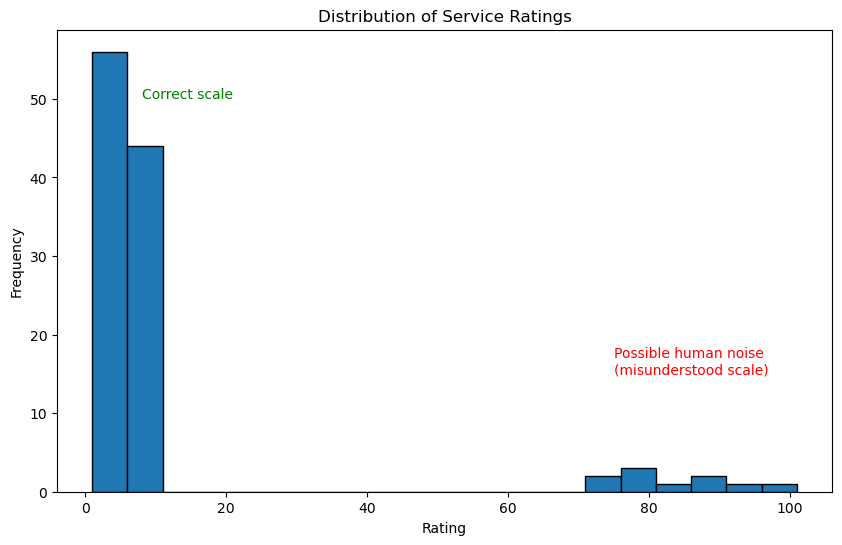

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generating synthetic data for demonstration
np.random.seed(0)
valid_ratings = np.random.randint(1, 11, 100)  # Ratings on a scale of 1 to 10
erroneous_ratings = np.random.randint(70, 101, 10)  # Erroneous ratings out of 100
ratings = pd.Series(np.concatenate([valid_ratings, erroneous_ratings]))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=range(1, 105, 5), edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Service Ratings')

# Highlighting potential noise
#plt.axvline(x=6, color='green', linestyle='--')
plt.text(8, 50, 'Correct scale', color='green')
#plt.axvline(x=80, color='red', linestyle='--')
plt.text(75, 15, 'Possible human noise\n(misunderstood scale)', color='red')

plt.show()


### Did you find LLMs useful for anything in this exercise? Explain why/why not.

Yes, after my first answers, I ran them through the ChatGPT, and it gave me some more ideas about bias and consequences and also a few examples of human noise to chose from. Also, I made the above exampel with chatGPT ^